## Name: Aidil Adham bin Ismail
## Position: Junior Data Scientist
## Task: Technical Test - eBdesk Malaysia Sdn Bhd

# 

### Task Description

### 1. The Shopee data was collected daily during the mentioned time range. Based on thecurrent crawling system, some products may be crawled in several days. We want to get listed products from the data that was listed during May 2023.

In [1375]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1376]:
# Import Dataset

df = pd.read_csv('20240121_shopee_sample_data_ (1).csv')

# Convert w_date to datetime format and filter for May 2023
df = df[pd.to_datetime(df['w_date'], errors='coerce').between('2023-05-01', '2023-05-31')]

df.head()

C:\Users\Adham\AppData\Local\Temp\ipykernel_11592\1721592774.py:3: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('20240121_shopee_sample_data_ (1).csv')
C:\Users\Adham\AppData\Local\Temp\ipykernel_11592\1721592774.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = df[pd.to_datetime(df['w_date'], errors='coerce').between('2023-05-01', '2023-05-31')]


,price_ori,delivery,item_category_detail,specification,title,w_date,link_ori,item_rating,seller_name,idElastic,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
8030,23351.9,NaN,Shopee | Cameras & Drones | Mirrorless Cameras...,Product Specifications Category Shopee Cameras...,Canon R5 + Kit 24-105 f4L Condition | Shopee M...,5/5/2023,https://shopee.com.my/Canon-R5-Kit-24-105-f4L-...,No ratings yet,seeworldcamera6l.my,875a9274cae52190cad9616e72c6a10c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8031,0.15,NaN,Shopee | Home & Living | Housekeeping & Laundr...,Product Specifications Category Shopee Home & ...,SABUN BASUH CANDY (ready stock) | Shopee Malaysia,2/5/2023,https://shopee.com.my/SABUN-BASUH-CANDY-%28rea...,5,beautylady98,02da5ad0d06dceee46b01948145e803c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8032,0.7,NaN,Shopee | Groceries & Pets | Baking Supplies | ...,Product Specifications Category Shopee Groceri...,Cake Sprinkles / Sugar Ball/ Fancy Sprinkle / ...,2/5/2023,https://shopee.com.my/Cake-Sprinkles-Sugar-Bal...,5,yenmyshop,e56ece556655ff0b6c20728d1d22d3d1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8033,2.1,NaN,Shopee | Groceries & Pets | Food Staple | Nood...,Product Specifications Category Shopee Groceri...,K / œ+b öª ^¹¸ Mn ^¦b ¹¿b 60g ×C© T‹ ^¦b Y...,2/5/2023,https://shopee.com.my/%E4%BE%9D%E6%81%8B-%E5%8...,4.9,chuaren,0a95833552683b6be9acbd29b630e84f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8035,0.19,NaN,Shopee | Home & Living | Kitchen & Dining | Ki...,Product Specifications Category Shopee Home & ...,Food Grade Milk Powder Measurement Spoon Scoop...,2/5/2023,https://shopee.com.my/Food-Grade-Milk-Powder-M...,5,sundaewell.packaging.nitrigon,b5f619e338e24e57907ac099376fc5f9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1377]:
# Check Total Number of Rows or Columns
df.shape

(16484, 51)

In [1378]:
# Check columns
df.columns

Index(['price_ori', 'delivery', 'item_category_detail', 'specification',
       'title', 'w_date', 'link_ori', 'item_rating', 'seller_name',
       'idElastic', 'price_actual', 'sitename', 'idHash', 'total_rating', 'id',
       'total_sold', 'pict_link', 'favorite', 'timestamp', 'desc',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [1379]:
# Keep Relevant column for task and remove unnecessary column

df = df[['price_ori','item_category_detail','specification',
         'w_date','price_actual','total_rating','total_sold',
         'favorite']]

df.head()

,price_ori,item_category_detail,specification,w_date,price_actual,total_rating,total_sold,favorite
8030,23351.9,Shopee | Cameras & Drones | Mirrorless Cameras...,Product Specifications Category Shopee Cameras...,5/5/2023,23351.9,0,0,NaN
8031,0.15,Shopee | Home & Living | Housekeeping & Laundr...,Product Specifications Category Shopee Home & ...,2/5/2023,0.15,7,7,Favorite (2
8032,0.7,Shopee | Groceries & Pets | Baking Supplies | ...,Product Specifications Category Shopee Groceri...,2/5/2023,0.7,2.1k,2.1k,Favorite (1.3k
8033,2.1,Shopee | Groceries & Pets | Food Staple | Nood...,Product Specifications Category Shopee Groceri...,2/5/2023,1.6,1.1k,1.1k,Favorite (525
8035,0.19,Shopee | Home & Living | Kitchen & Dining | Ki...,Product Specifications Category Shopee Home & ...,2/5/2023,0.19,15,15,Favorite (15


In [1380]:
# Check Total Number of Rows or Columns
df.shape

(16484, 8)

In [1381]:
# Convert 'K' to numeric
def convert_k(series):
    return pd.to_numeric(series.astype(str).str.replace(r'[^0-9.kK]', '', regex=True)  # Keep only numbers and 'K'
                         .str.replace('K', 'e3', case=False), errors='coerce')  # Convert 'K' to 'e3' (1000)

# Apply function to selected columns
columns = ['favorite', 'total_rating', 'total_sold']
df[columns] = df[columns].apply(convert_k)

df.head()


,price_ori,item_category_detail,specification,w_date,price_actual,total_rating,total_sold,favorite
8030,23351.9,Shopee | Cameras & Drones | Mirrorless Cameras...,Product Specifications Category Shopee Cameras...,5/5/2023,23351.9,0.0,0.0,NaN
8031,0.15,Shopee | Home & Living | Housekeeping & Laundr...,Product Specifications Category Shopee Home & ...,2/5/2023,0.15,7.0,7.0,2.0
8032,0.7,Shopee | Groceries & Pets | Baking Supplies | ...,Product Specifications Category Shopee Groceri...,2/5/2023,0.7,2100.0,2100.0,1300.0
8033,2.1,Shopee | Groceries & Pets | Food Staple | Nood...,Product Specifications Category Shopee Groceri...,2/5/2023,1.6,1100.0,1100.0,525.0
8035,0.19,Shopee | Home & Living | Kitchen & Dining | Ki...,Product Specifications Category Shopee Home & ...,2/5/2023,0.19,15.0,15.0,15.0


#### Treating Missing Values

In [1382]:
# Check Missing values
df.isnull().sum()

price_ori               136
item_category_detail      0
specification             9
w_date                    0
price_actual             11
total_rating              8
total_sold                8
favorite                931
dtype: int64

In [1383]:
df.dtypes

price_ori                object
item_category_detail     object
specification            object
w_date                   object
price_actual             object
total_rating            float64
total_sold              float64
favorite                float64
dtype: object

In [1384]:
# Convert Numeric value into float or int

numeric_cols = ['price_ori', 'price_actual']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [1385]:
df.dtypes

price_ori               float64
item_category_detail     object
specification            object
w_date                   object
price_actual            float64
total_rating            float64
total_sold              float64
favorite                float64
dtype: object

In [1386]:
# Fill in missing values in price_ori, price_actual, total_rating, total_sold, favorite using MEDIAN
df['price_ori'] = df['price_ori'].fillna(df['price_ori'].median())

df['price_actual'] = df['price_actual'].fillna(df['price_actual'].median())

df['total_rating'] = df['total_rating'].fillna(df['total_rating'].median())

df['total_sold'] = df['total_sold'].fillna(df['total_sold'].median())

df['favorite'] = df['favorite'].fillna(df['favorite'].median())

#Fill in missing values in specification using MODE
df['specification'] = df['specification'].fillna(df['specification'].mode()[0])


df.head()

,price_ori,item_category_detail,specification,w_date,price_actual,total_rating,total_sold,favorite
8030,23351.90,Shopee | Cameras & Drones | Mirrorless Cameras...,Product Specifications Category Shopee Cameras...,5/5/2023,23351.90,0.0,0.0,177.0
8031,0.15,Shopee | Home & Living | Housekeeping & Laundr...,Product Specifications Category Shopee Home & ...,2/5/2023,0.15,7.0,7.0,2.0
8032,0.70,Shopee | Groceries & Pets | Baking Supplies | ...,Product Specifications Category Shopee Groceri...,2/5/2023,0.70,2100.0,2100.0,1300.0
8033,2.10,Shopee | Groceries & Pets | Food Staple | Nood...,Product Specifications Category Shopee Groceri...,2/5/2023,1.60,1100.0,1100.0,525.0
8035,0.19,Shopee | Home & Living | Kitchen & Dining | Ki...,Product Specifications Category Shopee Home & ...,2/5/2023,0.19,15.0,15.0,15.0


In [1387]:
# Check Missing values
df.isnull().sum()

price_ori               0
item_category_detail    0
specification           0
w_date                  0
price_actual            0
total_rating            0
total_sold              0
favorite                0
dtype: int64

#### Treating Duplicated Rows

In [1388]:
#Check Duplicated Rows
df[df.duplicated(keep=False)]

,price_ori,item_category_detail,specification,w_date,price_actual,total_rating,total_sold,favorite
8545,110.94,Shopee | Men Clothes | Sleepwear & Pajamas | P...,Product Specifications Category Shopee Men Clo...,2/5/2023,110.94,0.0,0.0,177.0
13369,110.94,Shopee | Men Clothes | Sleepwear & Pajamas | P...,Product Specifications Category Shopee Men Clo...,1/5/2023,110.94,0.0,0.0,177.0
14346,163.99,Shopee | Men Clothes | Sleepwear & Pajamas | P...,Product Specifications Category Shopee Men Clo...,1/5/2023,163.99,0.0,0.0,177.0
16107,163.99,Shopee | Men Clothes | Sleepwear & Pajamas | P...,Product Specifications Category Shopee Men Clo...,1/5/2023,163.99,0.0,0.0,177.0
18447,1.49,Shopee | Travel & Luggage | Others | Others,Product Specifications Category Shopee Travel ...,13/5/2023,1.49,0.0,0.0,177.0
20450,0.10,Shopee | Tickets & Vouchers | Bill Payments & ...,Product Specifications Category Shopee Tickets...,7/5/2023,0.10,0.0,0.0,177.0
20905,0.10,Shopee | Tickets & Vouchers | Bill Payments & ...,Product Specifications Category Shopee Tickets...,7/5/2023,0.10,0.0,0.0,177.0
21203,208.99,Shopee | Men Clothes | Sleepwear & Pajamas | P...,Product Specifications Category Shopee Men Clo...,8/5/2023,208.99,0.0,0.0,177.0
22728,208.99,Shopee | Men Clothes | Sleepwear & Pajamas | P...,Product Specifications Category Shopee Men Clo...,8/5/2023,208.99,0.0,0.0,177.0
26815,110.94,Shopee | Men Clothes | Sleepwear & Pajamas | P...,Product Specifications Category Shopee Men Clo...,10/5/2023,110.94,0.0,0.0,177.0


In [1389]:
# Remove duplicates and keep the first
df.drop_duplicates(keep='first', inplace = True) #Inplace true mean no need to assigned into new variable

# Recheck it again
df[df.duplicated(keep=False)]

,price_ori,item_category_detail,specification,w_date,price_actual,total_rating,total_sold,favorite


In [1390]:
df.shape

(16472, 8)

In [1391]:
# Dataset below show the data that was listed during May 2023.

df.head(10)

,price_ori,item_category_detail,specification,w_date,price_actual,total_rating,total_sold,favorite
8030,23351.90,Shopee | Cameras & Drones | Mirrorless Cameras...,Product Specifications Category Shopee Cameras...,5/5/2023,23351.90,0.0,0.0,177.0
8031,0.15,Shopee | Home & Living | Housekeeping & Laundr...,Product Specifications Category Shopee Home & ...,2/5/2023,0.15,7.0,7.0,2.0
8032,0.70,Shopee | Groceries & Pets | Baking Supplies | ...,Product Specifications Category Shopee Groceri...,2/5/2023,0.70,2100.0,2100.0,1300.0
8033,2.10,Shopee | Groceries & Pets | Food Staple | Nood...,Product Specifications Category Shopee Groceri...,2/5/2023,1.60,1100.0,1100.0,525.0
8035,0.19,Shopee | Home & Living | Kitchen & Dining | Ki...,Product Specifications Category Shopee Home & ...,2/5/2023,0.19,15.0,15.0,15.0
8036,0.68,Shopee | Home & Living | Home Decor | Artifici...,Product Specifications Category Shopee Home & ...,2/5/2023,0.38,5000.0,5000.0,4600.0
8037,90.00,Shopee | Sports & Outdoor | Basketball | Others,Product Specifications Category Shopee Sports ...,2/5/2023,26.89,49.0,49.0,48.0
8038,0.99,Shopee | Home & Living | Stationery | Letters ...,Product Specifications Category Shopee Home & ...,2/5/2023,0.99,2900.0,2900.0,788.0
8039,1.00,Shopee | Groceries & Pets | Fresh & Frozen Foo...,Product Specifications Category Shopee Groceri...,2/5/2023,0.69,809.0,809.0,60.0
8040,28.00,Shopee | Men's Bags & Wallets | Others | Others,Product Specifications Category Shopee Men's B...,2/5/2023,22.40,4.0,4.0,22.0


#### Dataset have been cleaned, now lets jump to next question

### Univariate Analysis
### 2. Show how many products are crawled each date.

In [1392]:
# Count the number of products for each date
product_crawled = df['w_date'].value_counts().sort_index()

product_crawled

w_date
1/5/2023     3546
10/5/2023     887
11/5/2023     897
12/5/2023    2436
13/5/2023    3645
2/5/2023      448
3/5/2023      963
4/5/2023      200
5/5/2023      840
6/5/2023      730
7/5/2023      566
8/5/2023      752
9/5/2023      562
Name: count, dtype: int64

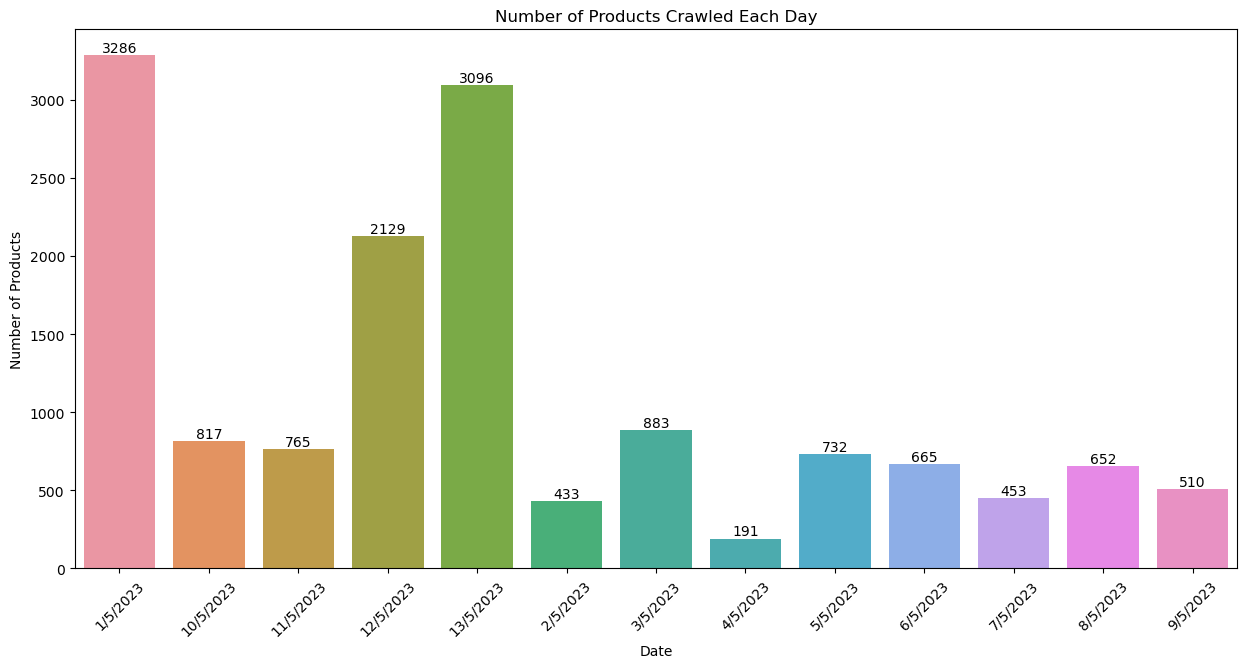

In [1417]:
# Bar chart to show Number of products crawled per date

plt.figure(figsize=(15, 7))
ax = sns.countplot(x='w_date', data=df, order=sorted(df['w_date'].unique()))
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Products")
plt.title("Number of Products Crawled Each Day")

plt.show()

##### Conclusion

1. Some days had way more products crawled, like May 1st (3,546) and May 13th (3,645). Maybe it was a scheduled run or a big update.

2. Most days had around 500-1,000 products, which looks like a normal daily crawl.

3. May 12th (2,436) had a suddenly jump, maybe something special happened that day.

4. May 4th was very low (200), so maybe there was an issue or less data available.

### 3. Show number of listing product based on location. You can extract this from “specification” field.

In [1394]:
# States in Malaysia
states = ["Johor", "Kedah", "Kelantan", "Melaka", "Negeri Sembilan", "Pahang",
          "Perak", "Perlis", "Pulau Pinang", "Sabah", "Sarawak", "Selangor",
          "Terengganu", "Kuala Lumpur", "Putrajaya", "Labuan"]

# Extract the state from 'specification'
def get_location(text):
    for state in states:
        if isinstance(text, str) and state in text:
            return state
    return "Oversea"

# Apply function and count
df["location"] = df["specification"].apply(get_location)
df["location"].value_counts()

location
Selangor           5750
Oversea            3470
Kuala Lumpur       2371
Johor              1190
Perak              1080
Kedah               490
Negeri Sembilan     460
Kelantan            397
Melaka              370
Pahang              321
Terengganu          260
Pulau Pinang        107
Sabah                83
Perlis               59
Sarawak              48
Putrajaya            16
Name: count, dtype: int64

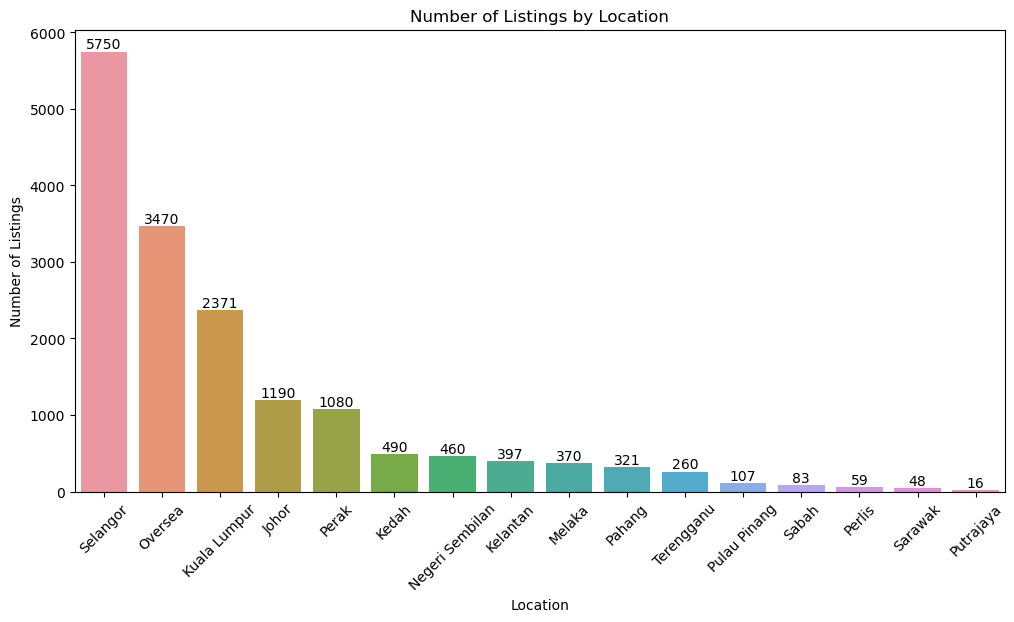

In [1395]:
# Bar Chart to show Number of Listings by State

plt.figure(figsize=(12, 6))

ax = sns.countplot(x=df["location"], order=df["location"].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)

plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Number of Listings")
plt.title("Number of Listings by Location")

plt.show()

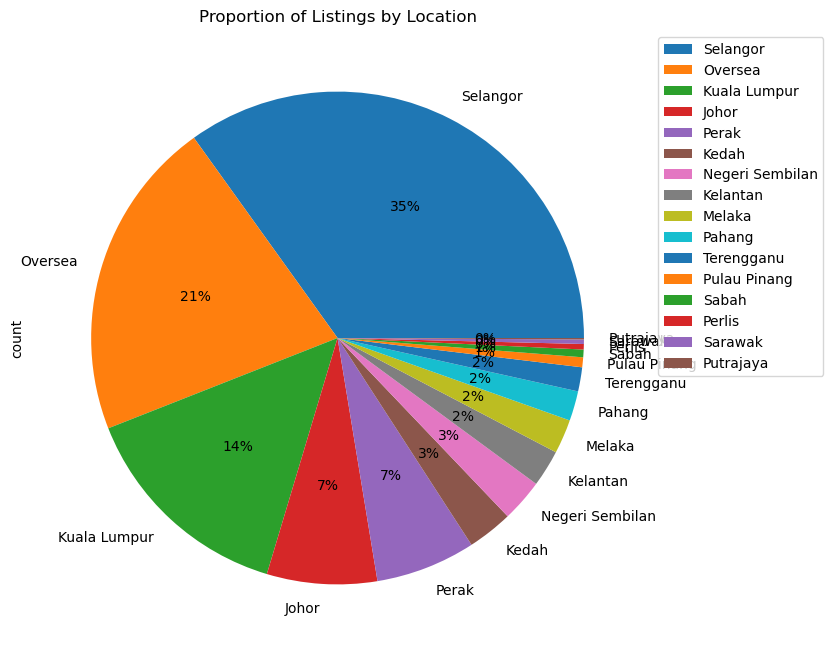

In [1396]:
# Pie chart to show proportion of listing by Location

plt.figure(figsize=(8, 8))
df["location"].value_counts().plot(kind="pie", autopct="%.0f%%")
plt.title("Proportion of Listings by Location")
plt.legend(labels=df['location'].value_counts().index, loc="upper right", bbox_to_anchor=(1.3, 1))

plt.show()

###### Conclusion
- The highest number of listings (35%) comes from Selangor, showing its dominance in the market.
- Overseas listings (21%) indicate a significant international supply.
- KL (14%) and Johor (7%) are also key hubs for listings.
- Perlis, Sarawak, Sabah, and Putrajaya have minimal listings, likely due to lower demand or logistical challenges.
- Increasing listings in underserved states, especially in East Malaysia, could improve accessibility and business reach.

### 4. Item category detail may have this format: “Shopee | Women's Clothing | Outerwear | Coats & Jackets”.
We can split it into:

Main category : Women’s Clothing

Subcategory 1 : Outerwear

Subcategory 2 : Coats & Jackets

a. Show number of listing products based on main category.

b. For the top 3 main categories, show the top 5 subcategory 1 for that main category based on number of products

In [1397]:
# Split by '|' and strip spaces and remove 'Shopee'
df[['main_category', 'subcategory_1', 'subcategory_2']] = (
    df['item_category_detail'].str.split('|', expand=True).iloc[:, 1:4].apply(lambda x: x.str.strip()))

In [1398]:
# a. Show number of listing products based on main category.

df['main_category'].value_counts()

main_category
Men Clothes               1904
Health & Beauty           1868
Women Clothes             1691
Mobile & Accessories      1447
Baby & Toys               1310
Home & Living              992
Groceries & Pets           926
Home Appliances            786
Sports & Outdoor           733
Automotive                 732
Women's Bags               561
Men's Bags & Wallets       462
Watches                    406
Cameras & Drones           399
Muslim Fashion             390
Women Shoes                383
Fashion Accessories        354
Computer & Accessories     343
Games, Books & Hobbies     281
Men Shoes                  191
Travel & Luggage           114
Gaming & Consoles          102
Tickets & Vouchers          69
Others                      28
Name: count, dtype: int64

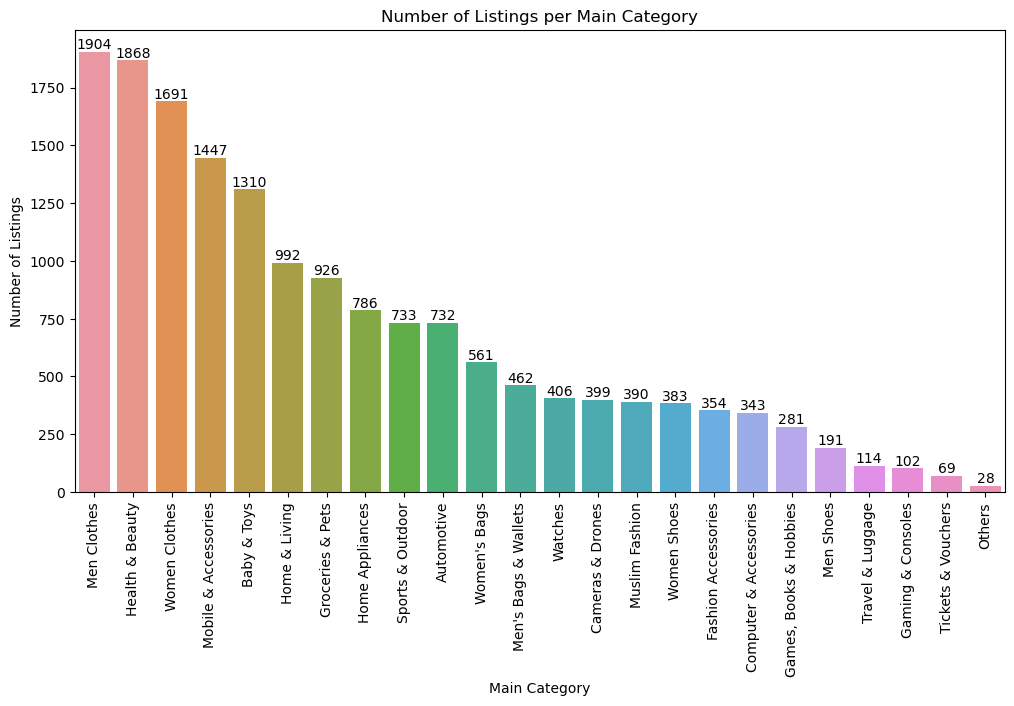

In [1399]:
# Bar chart to show Number of listings per main category

plt.figure(figsize=(12, 6))

ax = sns.countplot(x=df["main_category"], order=df["main_category"].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)

plt.xticks(rotation=90)
plt.xlabel("Main Category")
plt.ylabel("Number of Listings")
plt.title("Number of Listings per Main Category")
plt.show()

###### Conclusion
- The most listed product category is Men Clothes with 1,904 listings, followed by Health & Beauty (1,868) and Women Clothes (1,691).
- These three categories dominate the marketplace, indicating high demand and product availability.
- Mobile & Accessories and Baby & Toys also have a significant presence, suggesting strong consumer interest in these categories.
- Categories like Gaming & Consoles, Tickets & Vouchers, and Others have the fewest listings, showing relatively low product diversity or demand.
- This distribution suggests a focus on fashion, personal care, and daily-use items, reflecting consumer preferences in the marketplace.

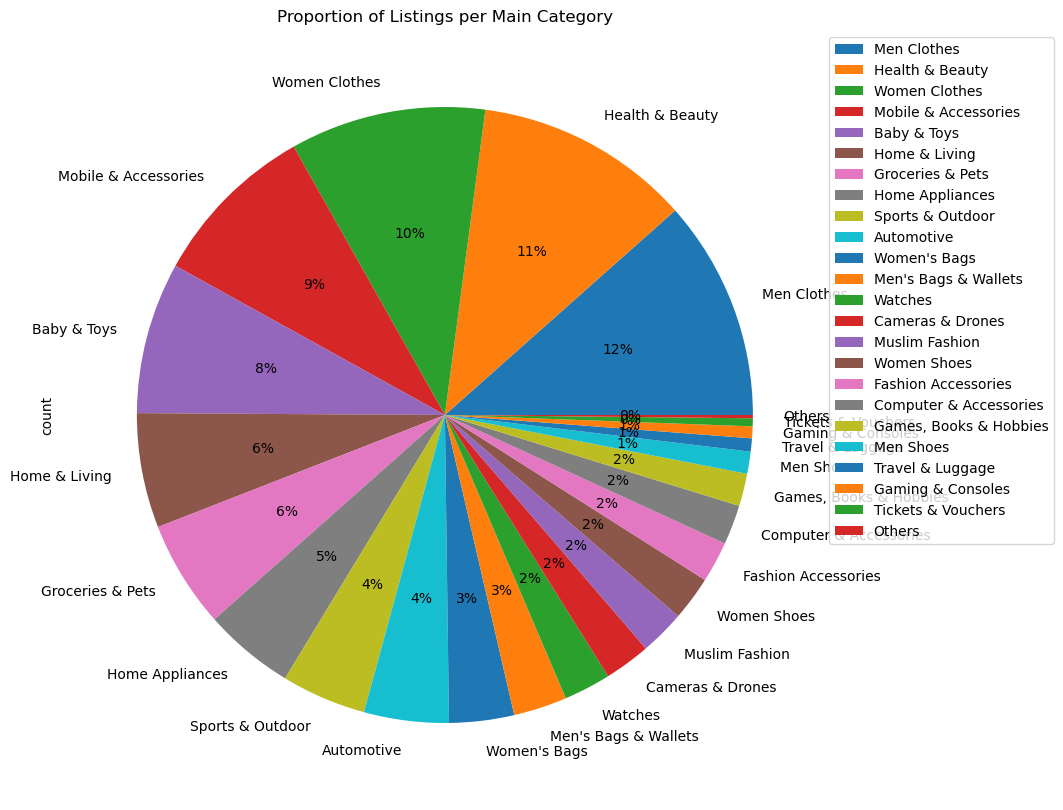

In [1400]:
plt.figure(figsize=(10, 10))
df['main_category'].value_counts().plot.pie(autopct='%.0f%%')
plt.title("Proportion of Listings per Main Category")
plt.legend(labels=df['main_category'].value_counts().index, loc="upper right", bbox_to_anchor=(1.3, 1))

plt.show()

###### Conclusion
- Men Clothes (12%), Health & Beauty (11%), and Women Clothes (10%) are the top three categories, making up a significant portion of total listings.
- Mobile & Accessories (9%) and Baby & Toys (8%) also hold a strong presence, indicating their popularity in the marketplace.
- Categories like Home & Living (6%), Groceries & Pets (5%), and Home Appliances (4%) contribute moderately to the total listings.
- Less dominant categories, such as Gaming & Consoles, Tickets & Vouchers, and Travel & Luggage, make up only 1% or less, indicating lower product availability or demand.
- The overall distribution highlights a strong focus on fashion, personal care, and everyday essentials, reflecting consumer buying trends.

In [1401]:
# b. For the top 3 main categories, show the top 5 subcategory 1 for that main category based on number of products

top_3_main = df['main_category'].value_counts().index[:3]

for category in top_3_main:
    print(f"\nTop 5 subcategories for {category}:")
    print(df[df['main_category'] == category]['subcategory_1'].value_counts().head(5))


Top 5 subcategories for Men Clothes:
subcategory_1
Sets      290
Suits     194
Others    170
Shirts    152
Pants     149
Name: count, dtype: int64

Top 5 subcategories for Health & Beauty:
subcategory_1
Foot Care              123
Sun Care               121
Skincare               115
Pedicure & Manicure    115
Eye Make Up            114
Name: count, dtype: int64

Top 5 subcategories for Women Clothes:
subcategory_1
Sports & Beachwear       185
Outerwear                181
Tops                     169
Others                   150
Playsuits & Jumpsuits    136
Name: count, dtype: int64


In [1402]:
# Create an empty list to store subcategory data
subcategory_data = []

# Store the top 5 subcategories for each main category
for category in top_3_main:
    subcategory_counts = df[df['main_category'] == category]['subcategory_1'].value_counts().head(5)
    for subcategory, count in subcategory_counts.items():
        # Rename 'Others' to distinguish between categories
        if subcategory == "Others":
            subcategory = f"{category} - Others"
        subcategory_data.append({"Main Category": category, "Subcategory": subcategory, "Count": count})

# Convert to DataFrame
subcategory_df = pd.DataFrame(subcategory_data)

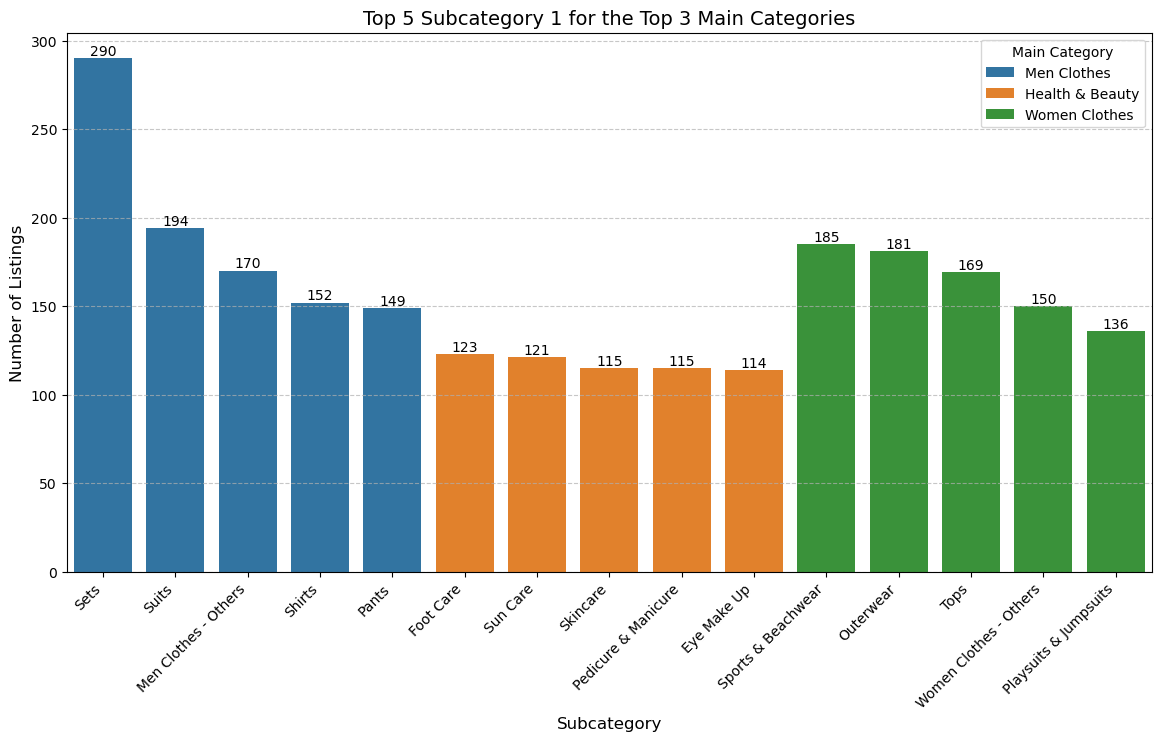

In [1403]:
# Plot using Seaborn
plt.figure(figsize=(14, 7))

ax = sns.barplot(data=subcategory_df, x="Subcategory", y="Count", hue="Main Category", dodge=False)
for label in ax.containers:
    ax.bar_label(label)

plt.legend(title="Main Category", fontsize=10)
plt.xlabel("Subcategory", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.title("Top 5 Subcategory 1 for the Top 3 Main Categories", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()

###### Conclusion
1. Men Clothes:
- The most listed subcategory is Sets (290 listings), significantly leading over other subcategories.
- Suits (194 listings) and Shirts (152 listings) indicate strong demand for formal and casual attire.
- Others (170 listings) suggests a variety of miscellaneous clothing items are available.
- Pants (149 listings) show stable demand compared to shirts.

2. Health & Beauty:
- Foot Care (123 listings) and Sun Care (121 listings) are the most listed subcategories, highlighting strong interest in skincare and self-care products.
- Skincare (115 listings), Pedicure & Manicure (115 listings), and Eye Makeup (114 listings) indicate a balanced demand for beauty and cosmetic products.

3. Women Clothes:
- Sports & Beachwear (185 listings) and Outerwear (181 listings) dominate the listings, showing high demand for active and seasonal wear.
- Tops (169 listings) and Playsuits & Jumpsuits (136 listings) suggest trendy fashion items are popular.
- Others (150 listings) indicate diverse clothing styles beyond specific categories.

### 5. Show price range for each main category

In [1404]:
df['price_actual'] = pd.to_numeric(df['price_actual'], errors='coerce')

# Remove outliers using IQR method
Q1 = df['price_actual'].quantile(0.25)
Q3 = df['price_actual'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['price_actual'] >= (Q1 - 1.5 * IQR)) & (df['price_actual'] <= (Q3 + 1.5 * IQR))]


In [1405]:
price_range = df.groupby('main_category')['price_actual'].agg(['min', 'max']).reset_index()
price_range

,main_category,min,max
0,Automotive,0.00,190.00
1,Baby & Toys,0.00,197.00
2,Cameras & Drones,0.10,197.06
3,Computer & Accessories,0.10,195.00
4,Fashion Accessories,0.10,165.00
5,"Games, Books & Hobbies",0.10,195.00
6,Gaming & Consoles,0.10,145.00
7,Groceries & Pets,0.08,190.00
8,Health & Beauty,0.10,195.60
9,Home & Living,0.07,185.00


###### Conclusion
- The minimum price for most categories starts from 0.00 to 0.35, indicating the presence of very low-cost or promotional items.
- The maximum price varies across categories, with the highest prices reaching above 190 in categories like Automotive, Baby & Toys, Cameras & Drones, and Home Appliances.
- Travel & Luggage has a relatively lower maximum price (34.90) compared to other categories.

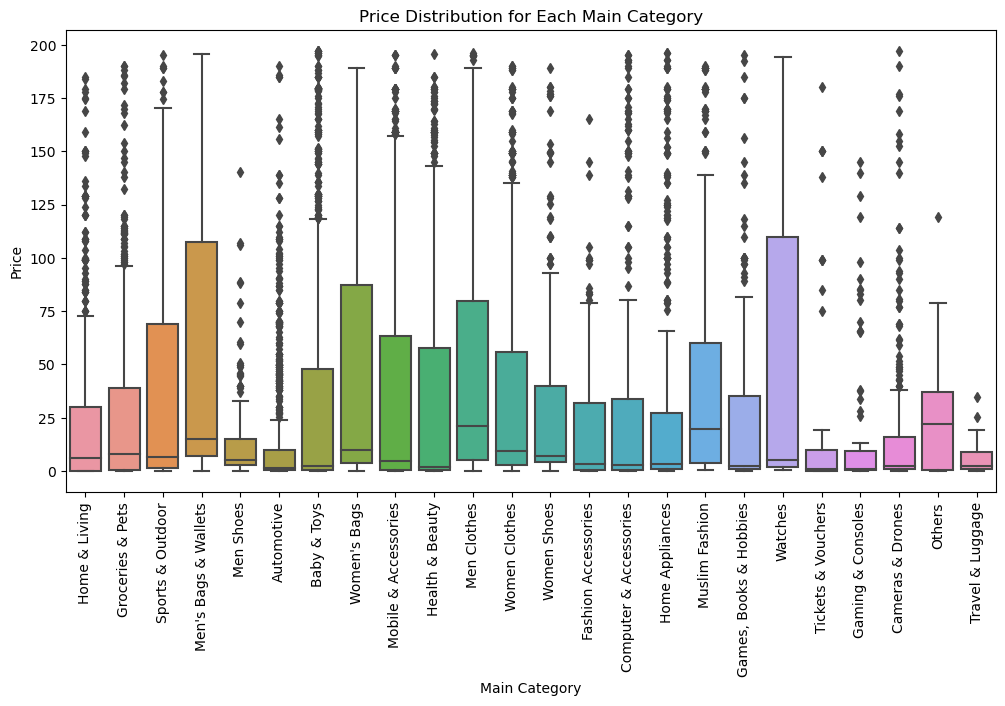

In [1406]:
# Box Plot to show price distribution per category

plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='price_actual', data=df)
plt.xticks(rotation=90)
plt.xlabel("Main Category")
plt.ylabel("Price")
plt.title("Price Distribution for Each Main Category")
plt.show()

###### Conclusion
- Some categories have a wide range of prices, meaning they contain both low-cost and expensive products.
- There are outliers in many categories, showing that a few products have significantly higher prices compared to the majority.

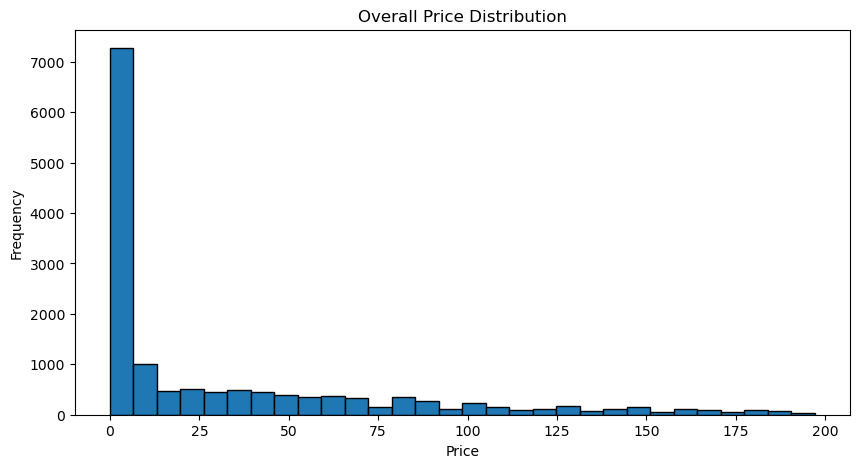

In [1407]:
#Histogram to see overall price distribution

plt.figure(figsize=(10, 5))
plt.hist(df['price_actual'], bins=30, edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Overall Price Distribution")
plt.show()

###### Conclusion
- The majority of products are priced under 25, as seen from the high frequency of low prices.
- There are fewer expensive products, meaning most items in this dataset are affordable.

### Multivariate Analysis
### 6. Show the revenue for each main category in descending order

In [1408]:
# Calculate The Total Revenue

df['revenue'] = df['price_actual'] * df['total_sold']

df['revenue']

8031        1.05
8032     1470.00
8033     1760.00
8035        2.85
8036     1900.00
          ...   
48531    6648.84
48532    6880.00
48533     378.48
48534       4.80
48535    2225.00
Name: revenue, Length: 14612, dtype: float64

In [1409]:
# Total Revenue for Each Main Category

revenue_per_category = df.groupby('main_category')['revenue'].sum().reset_index()
revenue_per_category

,main_category,revenue
0,Automotive,25609025.94
1,Baby & Toys,45809668.12
2,Cameras & Drones,1103883.07
3,Computer & Accessories,6016142.29
4,Fashion Accessories,4569079.00
5,"Games, Books & Hobbies",4076676.70
6,Gaming & Consoles,1491445.75
7,Groceries & Pets,36526752.06
8,Health & Beauty,68517061.33
9,Home & Living,66237099.73


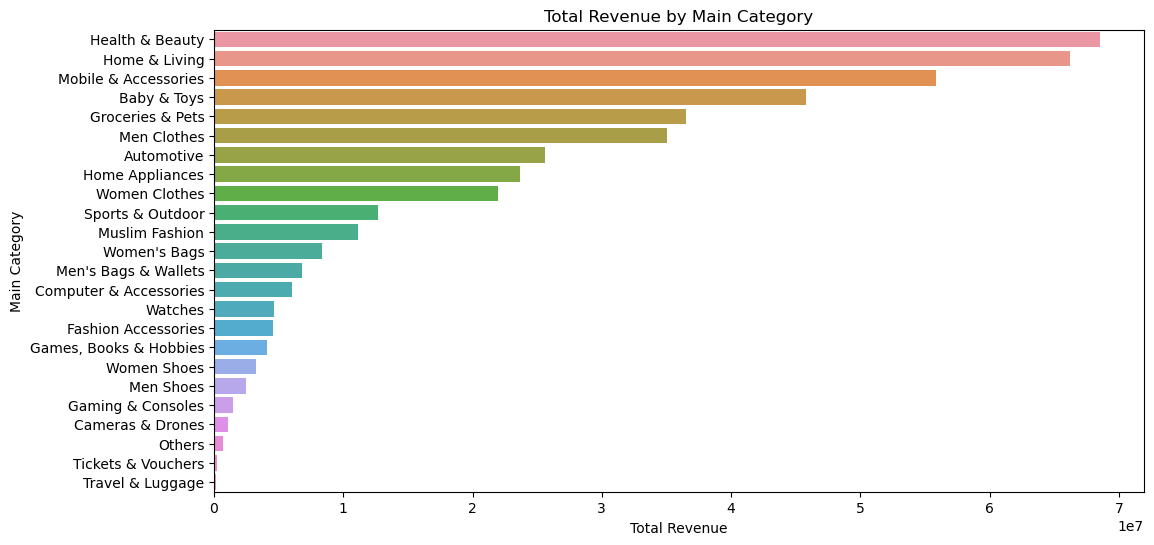

In [1410]:
# Bar Chart to show Revenue Per Category

plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='main_category', data=revenue_per_category.sort_values(by='revenue', ascending=False))
plt.xlabel("Total Revenue")
plt.ylabel("Main Category")
plt.title("Total Revenue by Main Category")
plt.show()

###### Conclusion
- The highest revenue comes from Health & Beauty, Home & Living, and Mobile & Accessories, indicating strong customer demand in these categories.
- On the other hand, Tickets & Vouchers and Travel & Luggage contribute the least revenue.

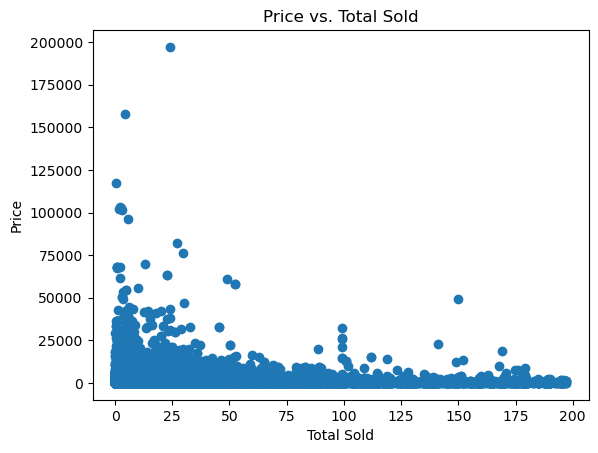

In [1411]:
#Scatter Plot Price vs Total Sold

plt.scatter(df['price_actual'], df['total_sold'])
plt.ylabel("Price")
plt.xlabel("Total Sold")
plt.title("Price vs. Total Sold")
plt.show()

###### Conclusion
- The scatter plot indicates an inverse relationship between price and total sales.
- Lower-priced products tend to sell more units, making total sales volume a crucial factor in revenue generation.

In [1412]:
#CORRELATION COEFICIENT

revenue_corr = df[['price_actual', 'total_sold', 'revenue']].corr(numeric_only=True).round(2)

revenue_corr

,price_actual,total_sold,revenue
price_actual,1.00,-0.07,0.18
total_sold,-0.07,1.00,0.53
revenue,0.18,0.53,1.00


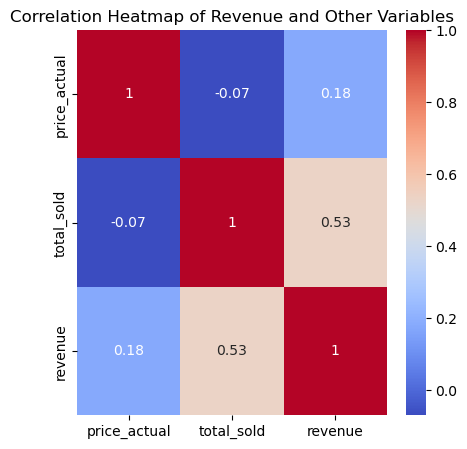

In [1413]:
# Correlation Heatmap between Revenue and Other Variables

plt.figure(figsize=(5,5))
sns.heatmap(revenue_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Revenue and Other Variables")
plt.show()

###### Conclusion
- The heatmap shows that total_sold has a stronger correlation (0.53) with revenue compared to price_actual (0.18).
- This suggests that the number of items sold has a bigger impact on total revenue than product price.